In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn

In [5]:
data = pd.read_csv("bitcoin_train.csv", index_col = 0)

/opt/conda/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
data.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,1BpvJgUs7UprQu9z8fLsP7pFvFcCscHRCV,2011,287,2,0.250000,1,0,2,3.009500e+08,white
1,1EnSeTPjMxZm9X9iQDYmMUDoLQQ3ouDN6F,2015,77,0,1.000000,1,0,1,4.820000e+07,white
2,1mwkhYHeoqGBkVW84yFpYCSqRDt5TWSBQ,2011,164,52,0.000977,23,0,2,2.349582e+10,white
3,19XUCsxgpHZGXKLgVMpdoyZqcFdeM3pGeE,2014,86,144,0.000001,1555,1152,2,9.581274e+07,white
4,14Ef6MGSYLEbigo55CpPBGEGSGYwwB7xhY,2015,261,6,0.250000,1,0,2,3.424024e+07,white


In [14]:
freq_dict = {}
black = data[data["label"] != "white"]
for i in range(len(black)):
    if (black.iloc[i]["label"] not in freq_dict.keys()):
        freq_dict[black.iloc[i]["label"]] = black.iloc[i]["count"]
    else:
        freq_dict[black.iloc[i]["label"]] += black.iloc[i]["count"]
freq_dict["other"] = 0
for i in list(freq_dict.keys()):
    if (freq_dict[i] <= 100000):
        freq_dict["other"] += freq_dict[i]
        del freq_dict[i]
freq_dict

{'CryptoWall': 4198413,
 'Cerber': 5402451,
 'CryptoLocker': 2244009,
 'Locky': 5542529,
 'DMALockerv3': 277538,
 'CryptXXX': 1535356,
 'DMALocker': 205529,
 'WannaCry': 106545,
 'NoobCrypt': 123353,
 'other': 228486}

In [17]:
sum(list(black.loc[:, "count"]))

19864209

In [18]:
sum(freq_dict.values())

19864209

Text(0.5, 0, 'Occurance(in million)')

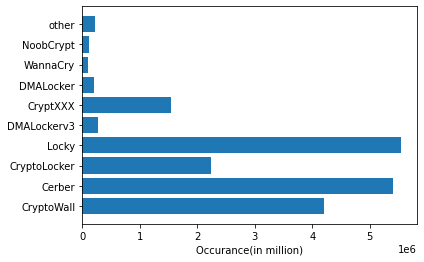

In [19]:
fig, ax = plt.subplots()
ax.barh(list(freq_dict.keys()), list(freq_dict.values()))
ax.set_xlabel('Occurance(in million)')